In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_excel("glass.xlsx",sheet_name="glass")

# 1. Exploratory Data Analysis (EDA):

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.shape

(214, 10)

In [ ]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
mean=data.mean()
median=data.median()
mode=data.mode().iloc[0]
std=data.std()
var=data.var()
pd.DataFrame([mean,median,mode,std,var],index=["mean","median","mode","std","variance"])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
median,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
mode,1.515900,13.000000,0.000000,1.540000,72.860000,0.000000,8.030000,0.000000,0.000000,2.000000
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
variance,0.000009,0.666937,2.084244,0.245942,0.599073,0.426651,2.033138,0.248248,0.009524,4.431571


# 2: Data Visualization:

<function matplotlib.pyplot.show(close=None, block=None)>

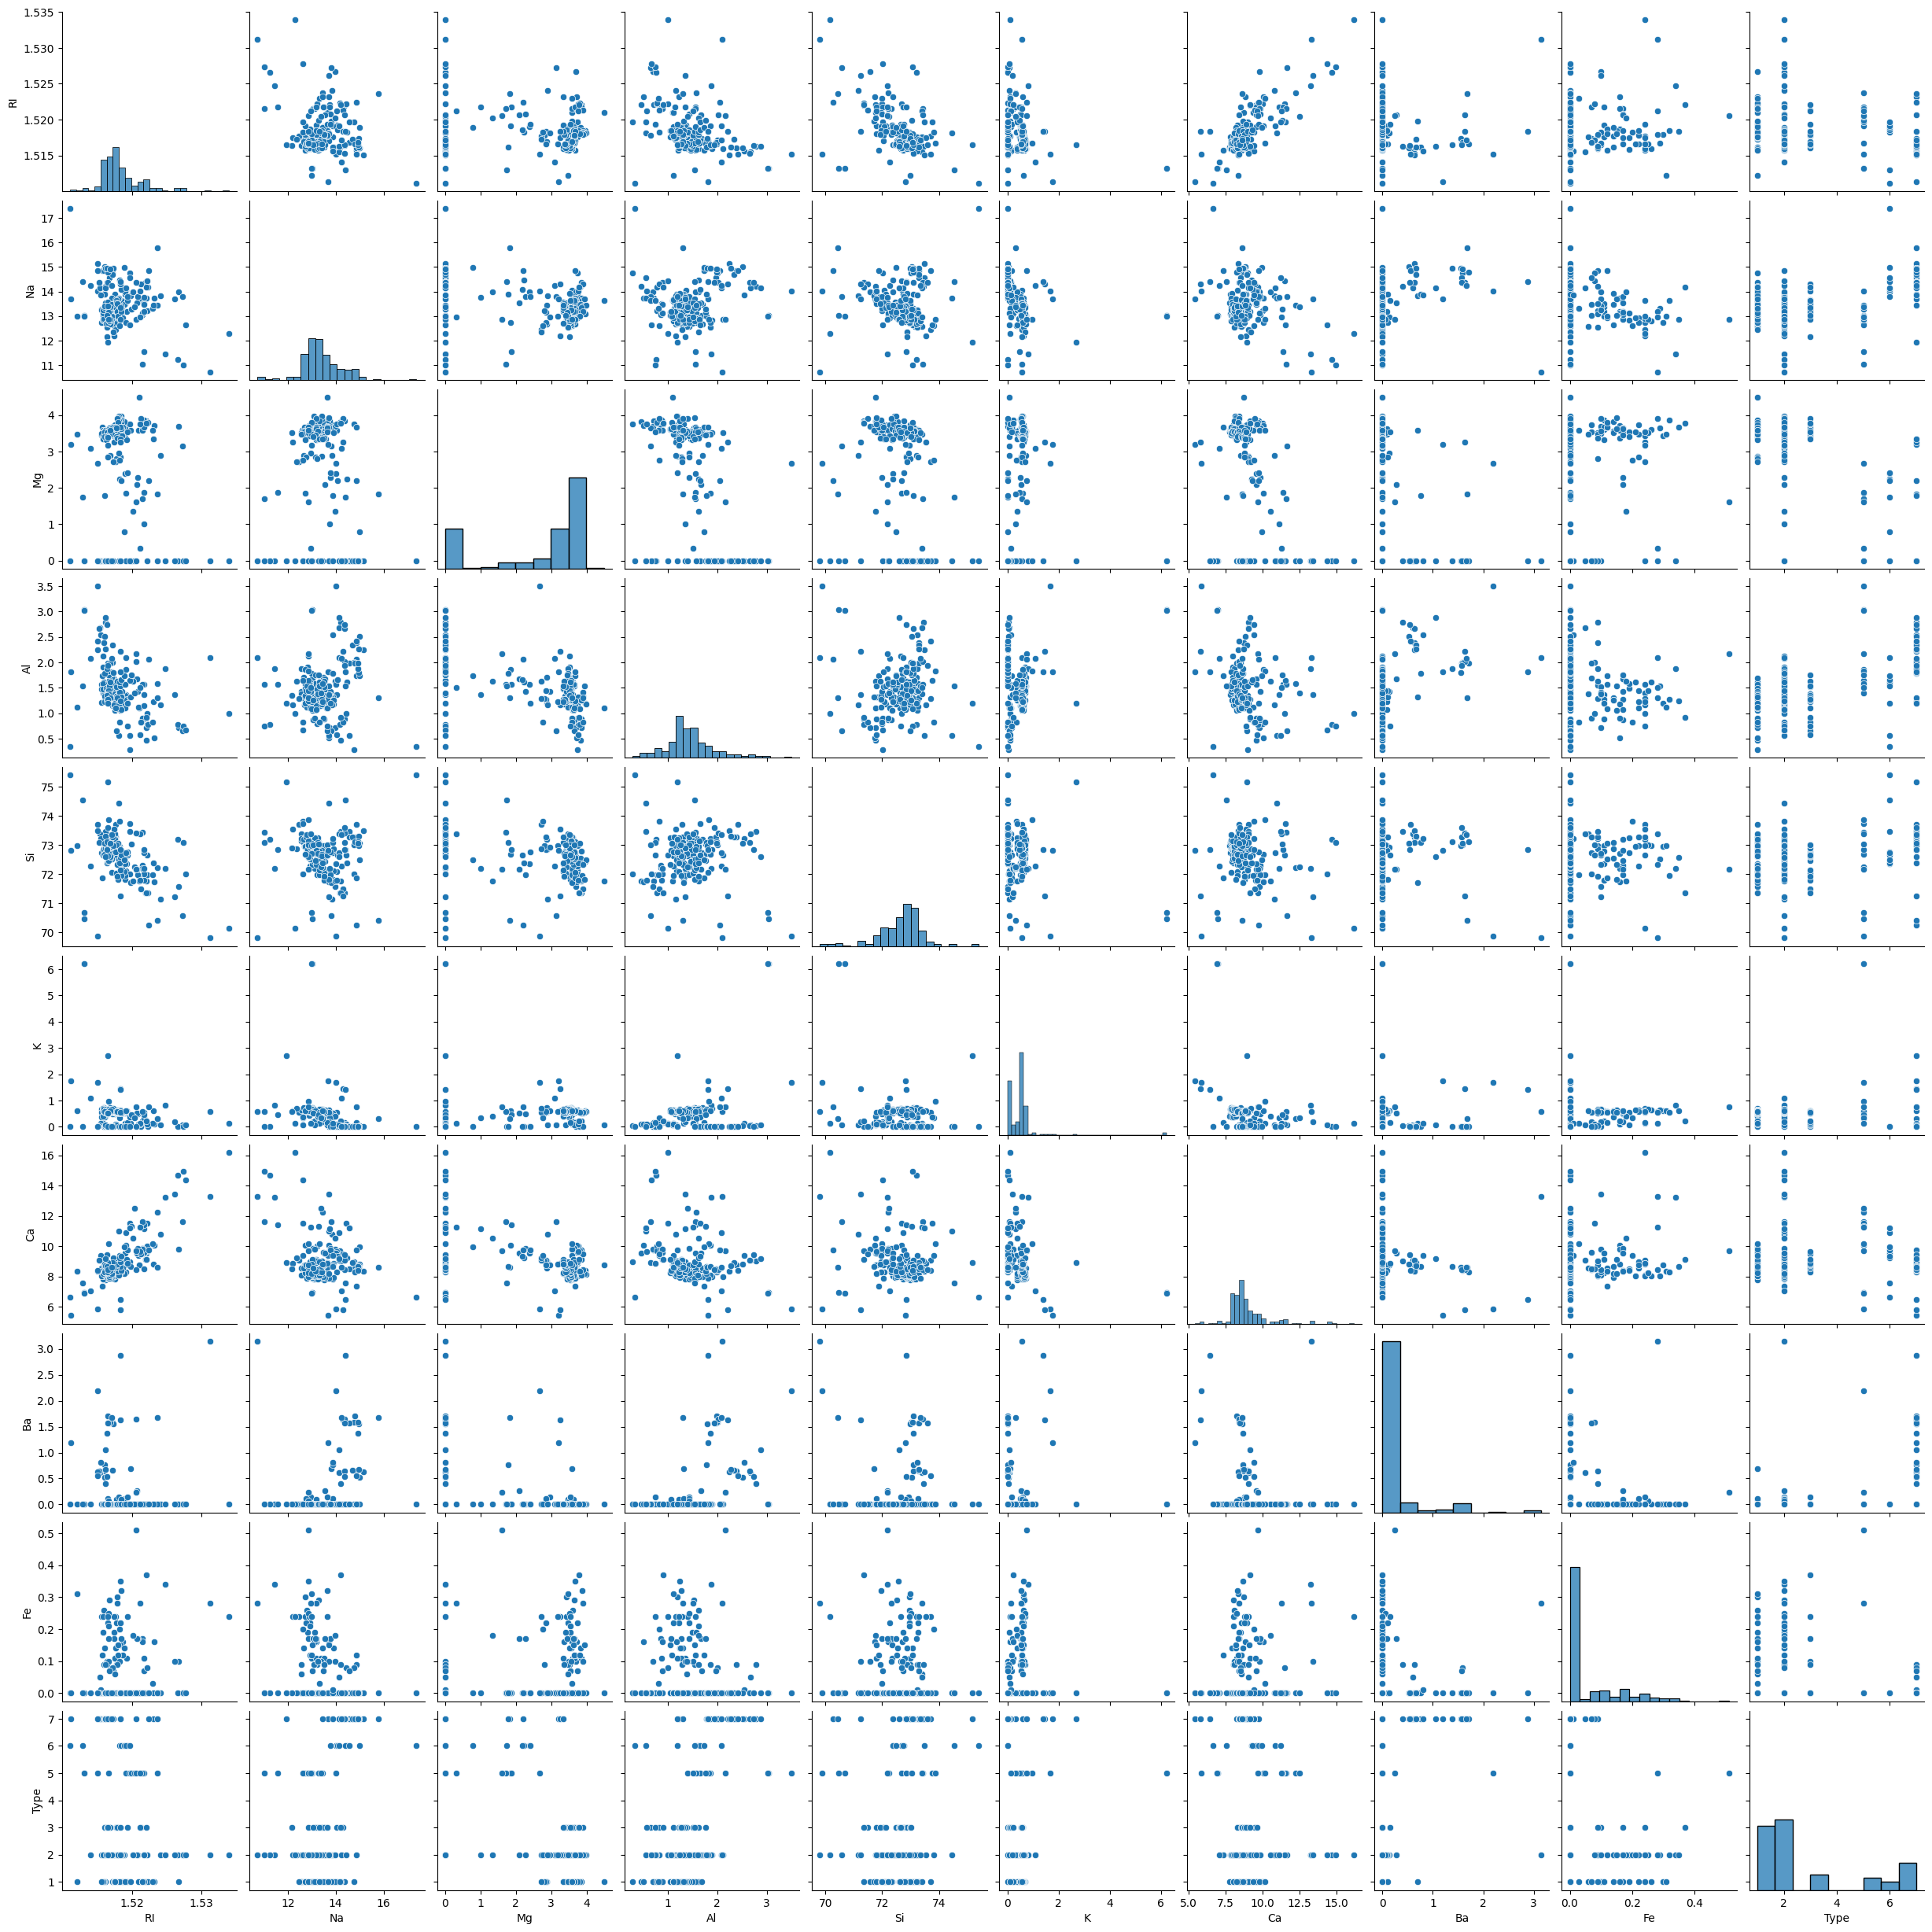

In [ ]:
sns.pairplot(data)
plt.show()

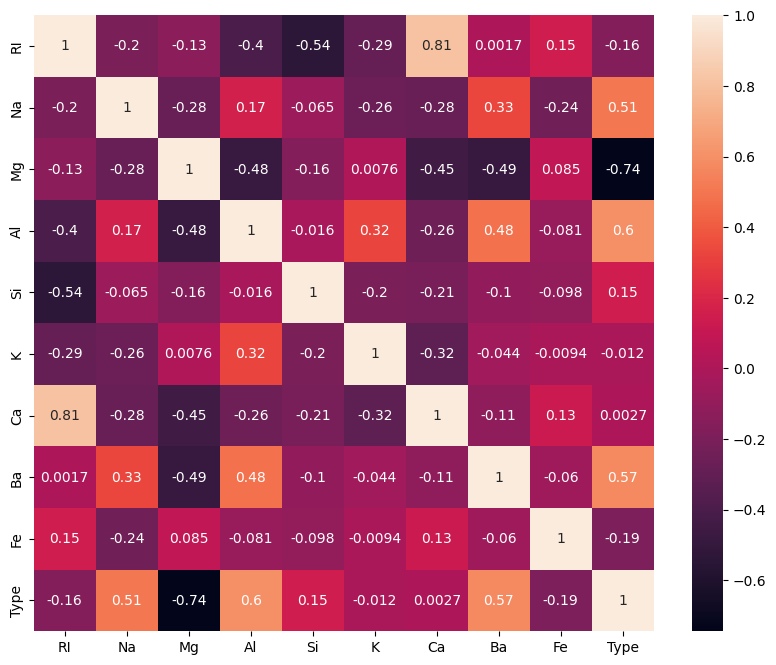

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

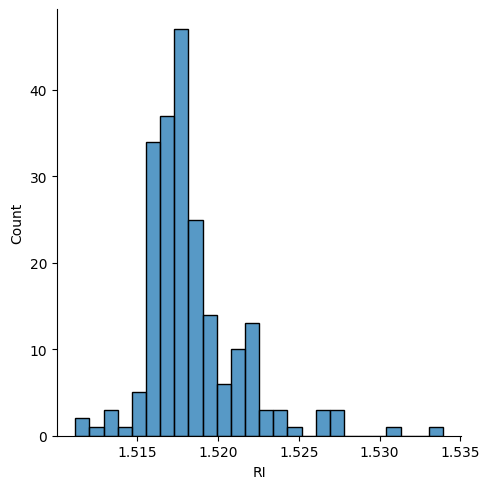

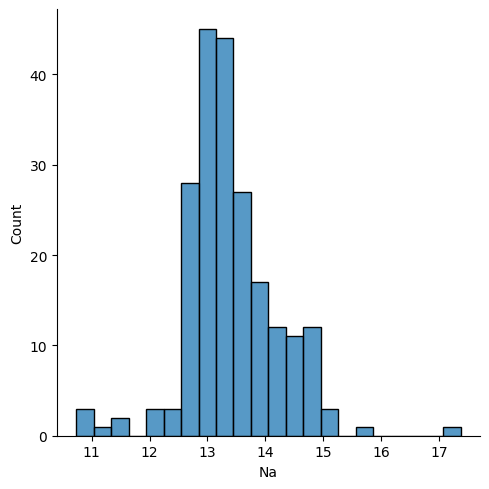

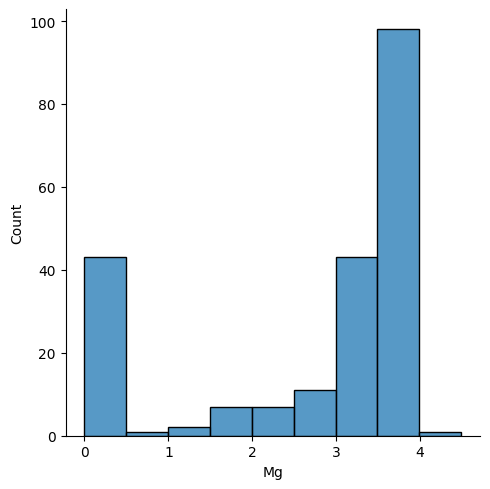

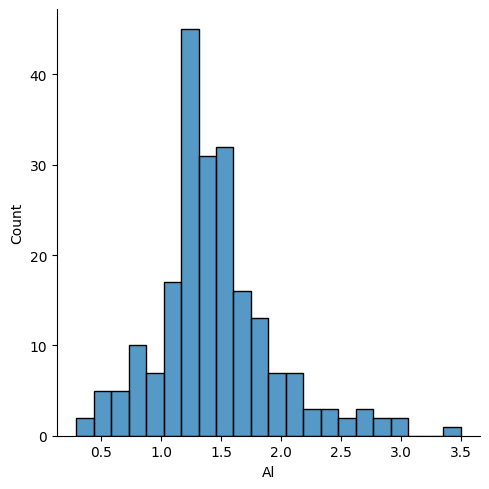

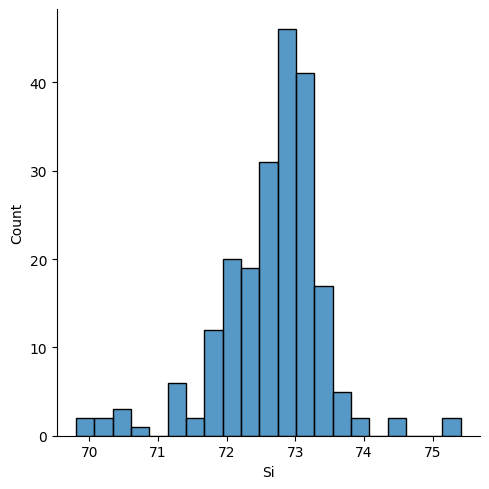

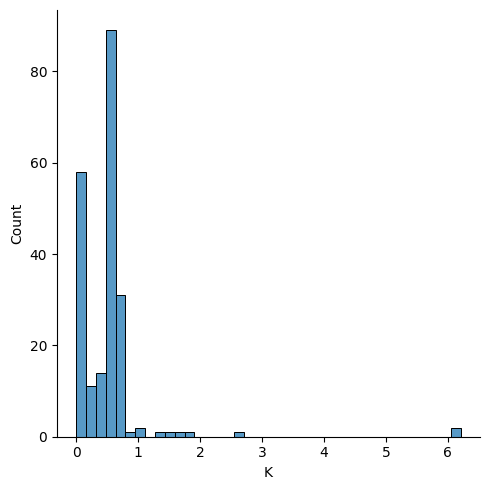

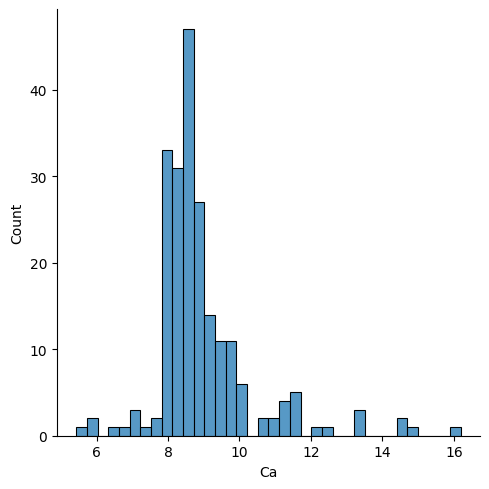

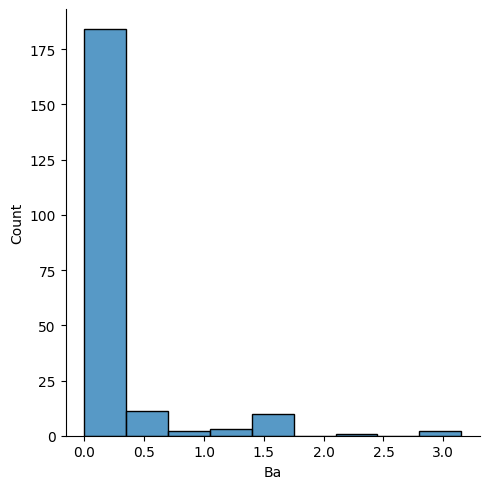

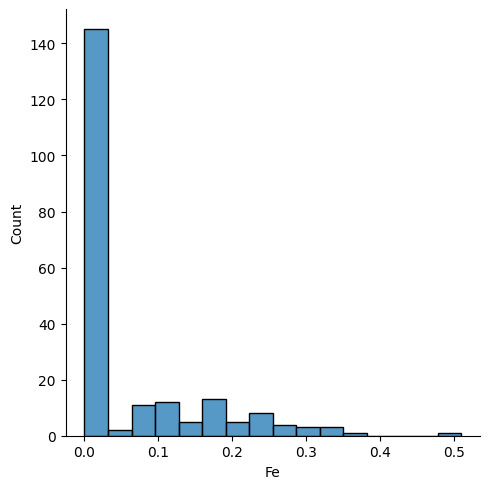

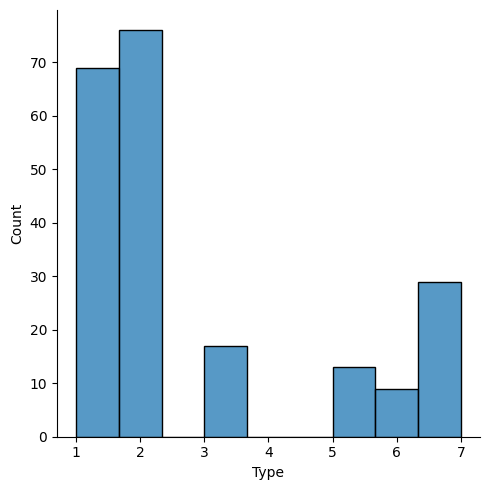

In [ ]:
for col in data.columns:
    sns.displot(data[col])
    plt.show()

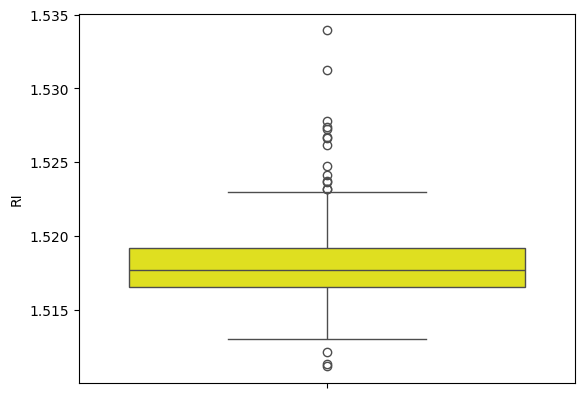

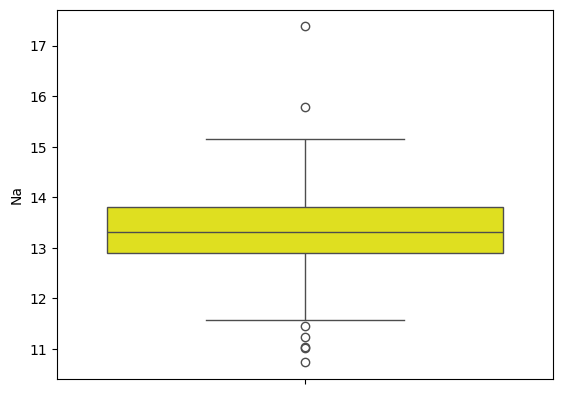

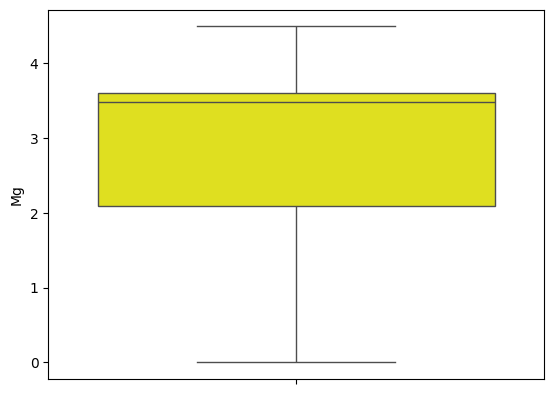

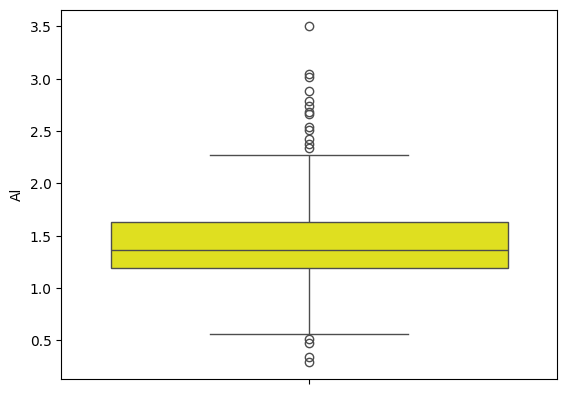

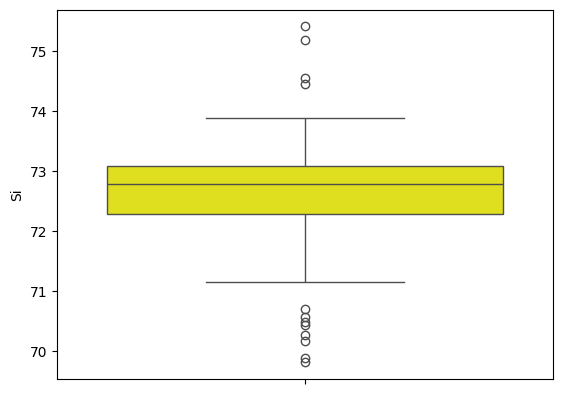

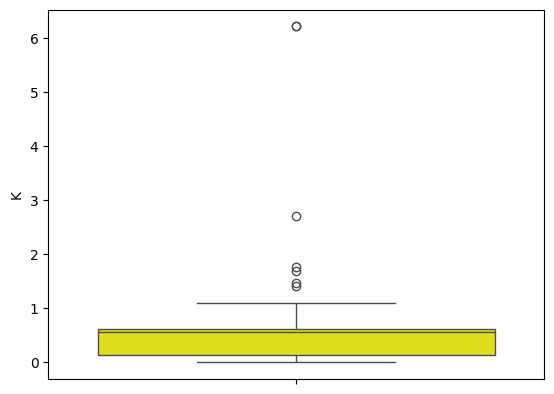

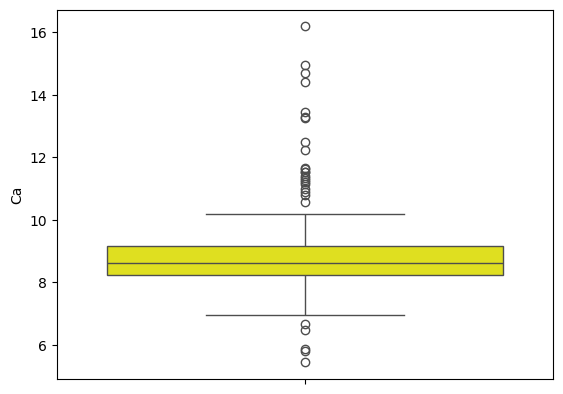

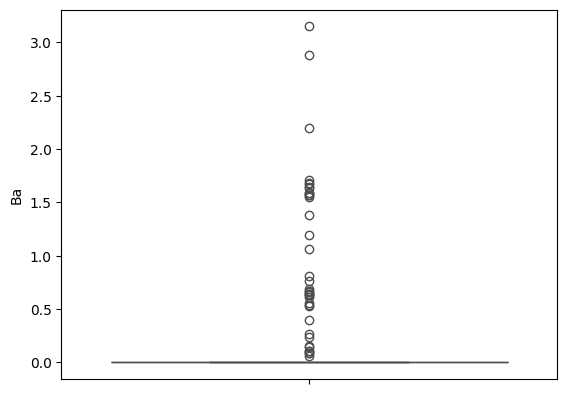

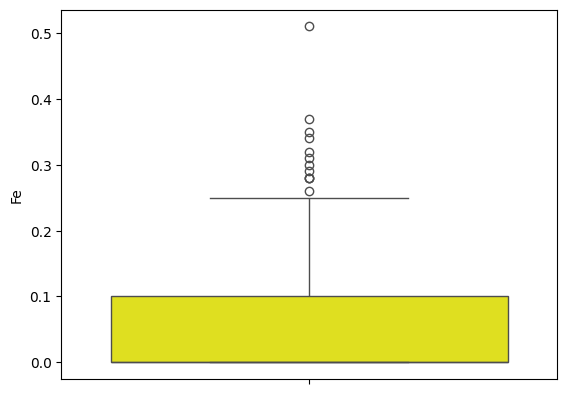

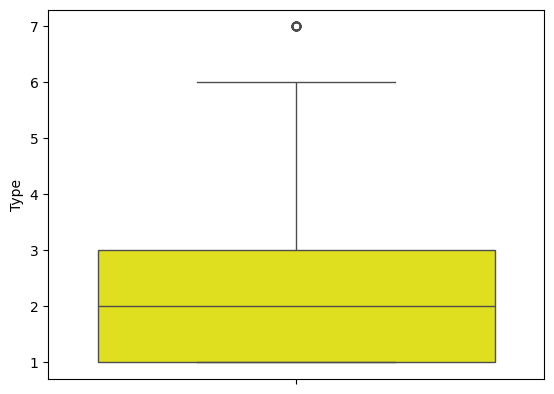

In [ ]:
for col in data.columns:
    sns.boxplot(data[col],color="yellow")
    plt.show()

# 3: Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS=StandardScaler()
SS.fit(data)

StandardScaler()

In [ ]:
scaled_data=SS.transform(data)

In [ ]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [ ]:
scaled_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,-0.851703
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,-0.851703
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,-0.851703
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,-0.851703
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703


# 4: Random Forest Model Implementation

In [ ]:
scaled_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
feature=scaled_data.drop("Type",axis=1)
target=data["Type"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

In [ ]:
RFC=RandomForestClassifier()

In [ ]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RFC.score(x_train,y_train)

1.0

In [ ]:
y_pred=RFC.predict(x_test)

In [ ]:
RFC.score(x_test,y_test)

0.7906976744186046

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.69      0.73      0.71        15
           3       1.00      1.00      1.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.79        43
   macro avg       0.82      0.75      0.78        43
weighted avg       0.80      0.79      0.79        43



# 5: Bagging and Boosting Methods

In [ ]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier

In [ ]:
bagging=BaggingClassifier()
boost=AdaBoostClassifier()

In [ ]:
boost.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
bagging.fit(x_train,y_train)

BaggingClassifier()

In [ ]:
bagging.score(x_train,y_train)

0.9705882352941176

In [ ]:
boost.score(x_train,y_train)

0.4235294117647059

In [ ]:
bag_pred=bagging.predict(x_test)

In [ ]:
bagging.score(x_test,y_test)

0.7441860465116279

In [ ]:
boost_pred=boost.predict(x_test)

In [ ]:
boost.score(x_test,y_test)

0.4186046511627907

In [ ]:
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

           1       0.60      0.90      0.72        10
           2       0.75      0.60      0.67        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.33      0.50         3
           7       0.89      0.89      0.89         9

    accuracy                           0.74        43
   macro avg       0.83      0.73      0.74        43
weighted avg       0.78      0.74      0.74        43



In [ ]:
print(classification_report(y_test,boost_pred))

              precision    recall  f1-score   support

           1       0.36      0.90      0.51        10
           2       0.22      0.13      0.17        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         3
           7       0.83      0.56      0.67         9

    accuracy                           0.42        43
   macro avg       0.35      0.38      0.34        43
weighted avg       0.38      0.42      0.36        43



# Additional Notes:


## 1. Explain Bagging and Boosting methods. How is it different from each other

- Bagging and Boosting are ensemble methods that combine multiple models to improve prediction accuracy.
- Bagging Creates multiple subsets of the original data using random sampling with replacement
- Boosting Trains models sequentially, where each subsequent model focuses on correcting errors made by previous models

**KEY Differences**
  - in **bagging model training is parallel** where as in **boosting it's Sequential**

## 2. Explain how to handle imbalance in the data.


* Imbalance in data occurs when one class has significantly more instances than another
* This can lead to biased models

Some ways to handle imbalanceed data:-

1. Resampling
2. Cost-sensitive Learning:
3. Ensemble Methods